# Crystallization Modelling Notebook
This notebook illustrates possibility of controlling the laboratory crystallization module hardware using advanced programming (e.g. this Python Jupyter notebook).

### Use
- goto top menu [Cell] --> [Run All]

### Outputs
- The first cell will demonstrated connecting to the crystallizer computer and retrieving real-time hardware present values. In particular, the values of the TCUs will be read and plotted in real time. 
    - This exemplifies reading current state of modules that can be used for advanced calculations/modelling.
    - To further confirm the communication, open the main UI and observe that the UI TCU values agree with the data read by this notebook.
- The second cell demonstrates updating hardware set points. In this case, the setpoints of the stirrers are varried sinusoidally (rediculous but demonstratable effect).
    - This illustrates setting the hardware setpoints based off of a possible advanced model.
    - To confirm the send values, open the main UI and observe that the UI stirrer values are changing with the values send by this notebook.

#### Importing the needed modules

In [1]:
import websocket
import numpy as np
import json
import threading
from matplotlib import pyplot as plt
from time import sleep

%matplotlib notebook

<IPython.core.display.Javascript object>


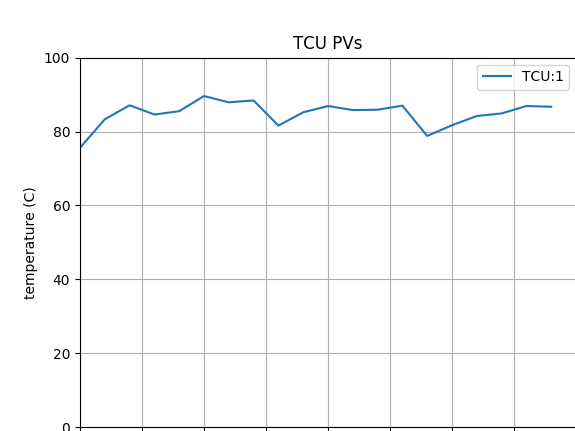

--- request header ---
GET /ws/crystallizer HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: 10.131.0.175:1880
Origin: http://10.131.0.175:1880
Sec-WebSocket-Key: RRa8cKzsRtiWHZtKufbYIg==
Sec-WebSocket-Version: 13


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Upgrade: websocket
Connection: Upgrade
Sec-WebSocket-Accept: 2/+Fx8+LOlKP1w3sdPMXBOQ1pPI=
-----------------------


open


KeyboardInterrupt: 

In [2]:
data = [0]*20

def start_websocket_listener():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("ws://10.131.0.175:1880/ws/crystallizer",
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    ws.on_open = on_open
    ws.run_forever()
    
def on_open(ws):
    print("open")

def on_error(ws, error):
    print(error)

def on_close(ws):
    ws.send("Watson Studio Listen End")
    
def on_message(ws, msg):
    msg = json.loads(msg)
    if msg["equipment"] == "TCU:1":
        if msg["command"] =="BATH:TEMP:PV":
            data.append(float(msg["value"]))

t = threading.Thread(target=start_websocket_listener)
t.start()

class LivePlot(object):
    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)

        ax.plot([0]*20, label='TCU:1')

        ax.set_xlim(0,20)
        ax.set_ylim(0,100)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.set_ylabel('temperature (C)')
        ax.grid()
        ax.set_title('TCU PVs')

        self.ax = ax
        self.fig = fig

    def update(self):             
        # update price
        line = self.ax.lines[0]
        #line.set_xdata(range(len(x)))
        #line.set_ydata(x)
        line.set_xdata(range(len(data[-20:])))
        line.set_ydata(data[-20:])
        self.fig.canvas.draw()
        
liveplot = LivePlot()
while True:
    sleep(10)
    liveplot.update()
    


<IPython.core.display.Javascript object>


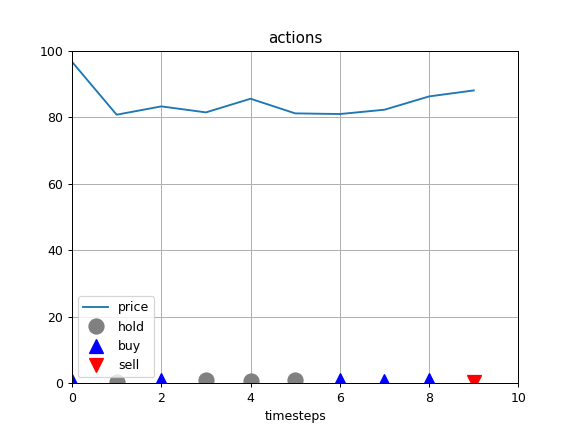

--- request header ---
GET /ws/crystallizer HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: 10.131.0.175:1880
Origin: http://10.131.0.175:1880
Sec-WebSocket-Key: eS37g4pS59H/7Ki7+j8jYw==
Sec-WebSocket-Version: 13


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Upgrade: websocket
Connection: Upgrade
Sec-WebSocket-Accept: wVHj38RKstbg0OvtB0UKbXUDfNw=
-----------------------


open
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4, 79.1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4, 79.1, 79.4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4, 79.1, 79.4, 74.9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4, 79.1, 79.4, 74.9, 77.4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.0, 89.4, 79.1, 79.4, 74.9, 77.4, 83.6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 81.3, 84.2, 88.

In [2]:
data = [0]*20

def start_websocket_listener():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("ws://10.131.0.175:1880/ws/crystallizer",
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    ws.on_open = on_open
    ws.run_forever()
    
def on_open(ws):
    print("open")

def on_error(ws, error):
    print(error)

def on_close(ws):
    ws.send("Watson Studio Listen End")
    
def on_message(ws, msg):
    msg = json.loads(msg)
    if msg["equipment"] == "TCU:1":
        if msg["command"] =="BATH:TEMP:PV":
            data.append(float(msg["value"]))

t = threading.Thread(target=start_websocket_listener)
t.start()

class LivePlot(object):
    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)

        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')

        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')

        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        #line.set_xdata(range(len(x)))
        #line.set_ydata(x)
        line.set_xdata(range(len(data[-10:])))
        line.set_ydata(data[-10:])
        print(data)

        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(0, 100)

        self.fig.canvas.draw()
        
# Test
import time
liveplot = LivePlot()
x=np.random.random((10,))
for i in range(20):
    time.sleep(10)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,))
    )
    
